# Análise de incêndios florestais no Brasil entre 1998-2017

<img src="https://media1.tenor.com/images/9d82f04f3b28893bb2a51eb32c28d96f/tenor.gif" width="750" align="center">

### Contexto

O planeta está cada vez mais quente e seco marcado pelos impactos do aquecimento global. Tais impactos são, cada vez mais, intesificados pela destruição ocasionada pelos incêndios florestais (DENNISON et al., 2014). Estes eventos causam diversos problemas, não só ambientais, mas também causam danos econômicos e representam um grande perigo para a vida. Compreender a frequência dos incêndios florestais em uma série de tempo pode ajudar a tomar medidas para evitá-los.

### Dados

Este conjunto de dados reporta o número de incêndios florestais no Brasil dividido por estados. A série compreende o período de aproximadamente 10 anos (1998 a 2017). Os dados podem ser encontrados abaixo:

- [dados.gov](http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif)

Com esses dados, é possível avaliar a evolução dos incêndios ao longo dos anos, bem como as regiões onde se concentraram.
A Amazônia legal compreende os estados do Acre, Amapá, Pará, Amazonas, Rondônia, Roraima e parte do Mato Grosso, Tocantins e Maranhão.

### Procedimentos

###### Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

###### Analisando os dados

In [2]:
df = pd.read_csv('datasets/amazon.csv')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [4]:
df['number'].describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

###### Checando valores faltantes e valores duplicados

In [5]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [6]:
len(df[df.duplicated() == True])

32

In [7]:
df.drop_duplicates(inplace = True)

###### Alterando nomes das colunas

In [8]:
df = df.rename(columns = {'year' : 'Ano'})
df = df.rename(columns = {'state' : 'Estados'})
df = df.rename(columns = {'month' : 'Meses'})
df = df.rename(columns = {'number' : 'Numero_Queimadas'})
df = df.rename(columns = {'date' : 'Data'})

### Análise por Ano

In [9]:
df['Ano'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

Text(0.5, 1.0, 'Quantidade de Incêndios por ano no Brasil')

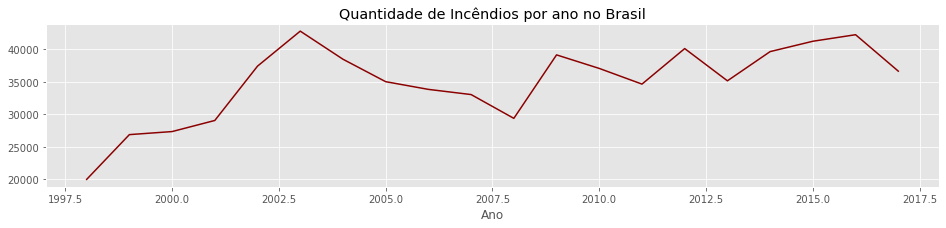

In [10]:
ax = df.groupby(['Ano'])['Numero_Queimadas'].sum()
ax.plot(kind = 'line', figsize=(16, 3), color = 'darkred')

plt.title("Quantidade de Incêndios por ano no Brasil")

Com este gráfico, podemos observar que entre os anos de 1998 e 2003 houve um grande aumento de incêndios e logo após entre 2003 e 2008 houve uma grande queda de incêndios. Logo após observamos que o número de incêndios fica aumentando e diminuindo. Com isso, concluimos que é díficil de se observar um aumento no número de incêndios, os números continuam muito altos. Vejamos o número de incêndios por mês.

### Análise por meses

In [11]:
df['Meses'].unique()

array(['Janeiro', 'Fevereiro', 'Mar�o', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [12]:
df = df.replace('Mar�o', 'Março')

In [13]:
df['Meses'].value_counts()

Outubro      540
Agosto       540
Setembro     540
Novembro     540
Junho        539
Julho        539
Fevereiro    535
Janeiro      535
Março        534
Abril        534
Maio         533
Dezembro     513
Name: Meses, dtype: int64

Text(0, 0.5, 'Média dos Incêndios')

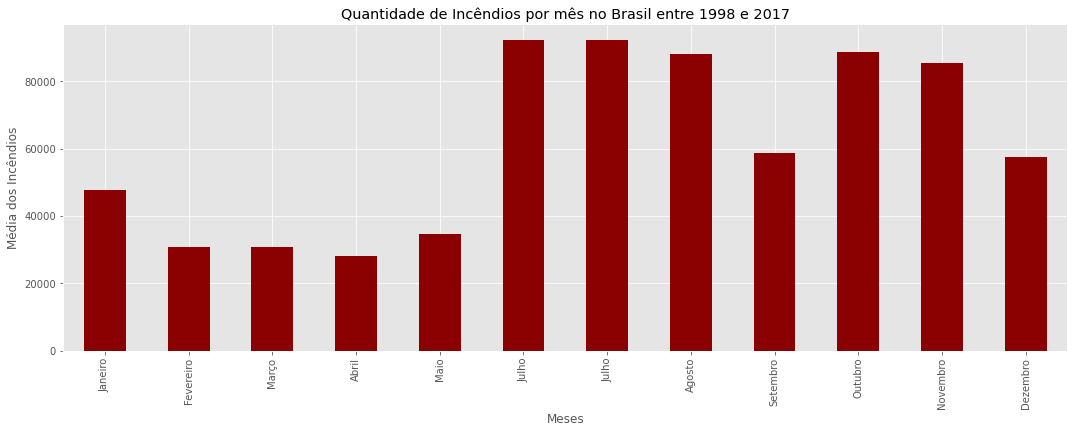

In [14]:
ax = df.groupby(['Meses'])['Numero_Queimadas'].sum().reindex(['Janeiro','Fevereiro','Março','Abril','Maio','Julho','Julho','Agosto',
                                                           'Setembro','Outubro','Novembro','Dezembro'])
ax.plot(kind = 'bar', figsize=(18, 6), color = 'darkred')
plt.title("Quantidade de Incêndios por mês no Brasil entre 1998 e 2017")
plt.xlabel('Meses')
plt.ylabel('Média dos Incêndios')

Entre o mês de Maio até o mês de novembro é considerado o período mais seco do Brasil. É por isso que podemos observar que há mais fogo neste período. Porém estamos analisando todos os estados. Por isso, não podemos considerar que esse período relativamente seco seja o único fator de aumento do número de incêndios. Vejamos o número de incêndios por estado.

### Análise por estado

In [15]:
df['Estados'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Par�', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [16]:
df = df.replace('Par�', 'Pará')
df = df.replace('Rio', 'Rio de Janeiro')
df = df.replace('Piau', 'Piaui')

In [17]:
df['Estados'].value_counts()

Rio de Janeiro      697
Mato Grosso         473
Paraiba             472
Sergipe             239
Rondonia            239
Amapa               239
Sao Paulo           239
Piaui               239
Santa Catarina      239
Minas Gerais        239
Alagoas             239
Distrito Federal    239
Tocantins           239
Bahia               239
Pará                239
Pernambuco          239
Goias               239
Acre                239
Roraima             239
Espirito Santo      239
Maranhao            239
Ceara               239
Amazonas            239
Name: Estados, dtype: int64

Text(0.5, 1.0, 'Quantidade de Incêndios por estado no Brasil entre 1998 e 2017')

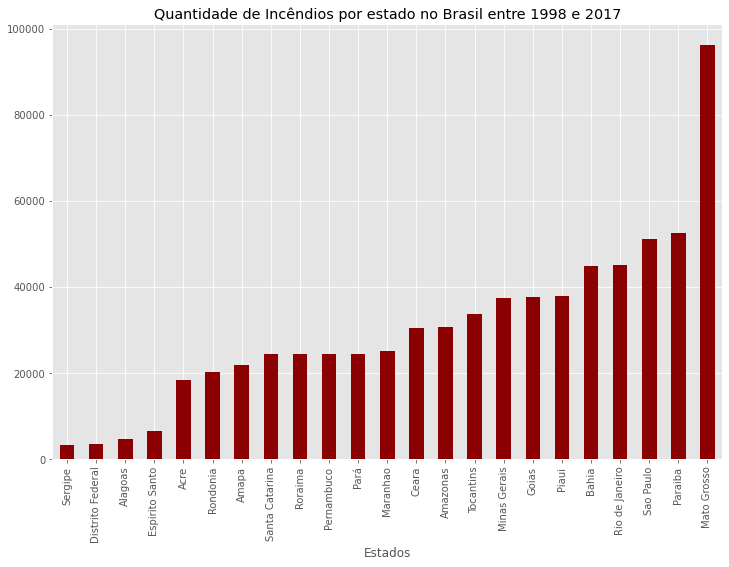

In [18]:
ax = df.groupby(['Estados'])['Numero_Queimadas'].sum().sort_values(ascending = True)
ax.plot(kind = 'bar', figsize=(12, 8), color = 'darkred')
plt.xticks(rotation =90)
plt.title("Quantidade de Incêndios por estado no Brasil entre 1998 e 2017")

Podemos observar que o estado do Mato Grosso é oque possui maior quantidade de incêndios em relação aos outros estados, sendo a Paraíba o segundo estado e São Paulo o terceiro estado. Vejamos o número de incêndios por regiões.

### Análise por regiões

In [19]:
Regiao_estado = {'Acre':'Norte', 'Amapa':'Norte', 'Amazonas':'Norte', 'Pará': 'Norte', 'Rondonia': 'Norte', 'Roraima': 'Norte',
                 'Tocantins': 'Norte', 'Alagoas': 'Nordeste', 'Bahia': 'Nordeste', 'Ceara': 'Nordeste', 'Maranhao': 'Nordeste',
                 'Paraiba': 'Nordeste', 'Pernambuco': 'Nordeste', 'Piaui': 'Nordeste', 'Sergipe': 'Nordeste', 
                 'Distrito Federal': 'Centro-Oeste', 'Goias': 'Centro-Oeste', 'Mato Grosso': 'Centro-Oeste',
                 'Rio de Janeiro': 'Sudeste', 'Sao Paulo': 'Sudeste', 'Minas Gerais': 'Sudeste', 'Espirito Santo': 'Sudeste',
                 'Sul': 'Santa Catarina'}

df['Regiao'] = df['Estados'].map(Regiao_estado)

In [20]:
df['Regiao'].value_counts()

Nordeste        2145
Norte           1673
Sudeste         1414
Centro-Oeste     951
Name: Regiao, dtype: int64

Text(0, 0.5, 'Média dos Incêndios')

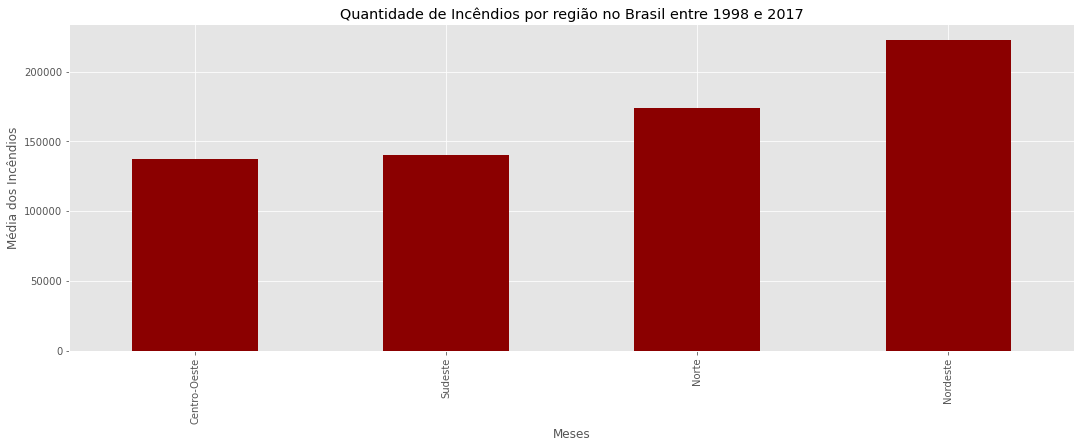

In [21]:
ax = df.groupby(['Regiao'])['Numero_Queimadas'].sum().sort_values(ascending = True)
ax.plot(kind = 'bar', figsize=(18, 6), color = 'darkred')
plt.title("Quantidade de Incêndios por região no Brasil entre 1998 e 2017")
plt.xlabel('Meses')
plt.ylabel('Média dos Incêndios')

Podemos observar que o Nordeste é a região com maior quantidade de incêndios, isso até é esperado pois é a região mais seca em relação as demais.

###### Análise por meses pela Região

Text(0.5, 1.0, 'Incêndios na Amazônia por Ano nas 5 Regiões Brasileiras entre os anos de 1998 a 2017')

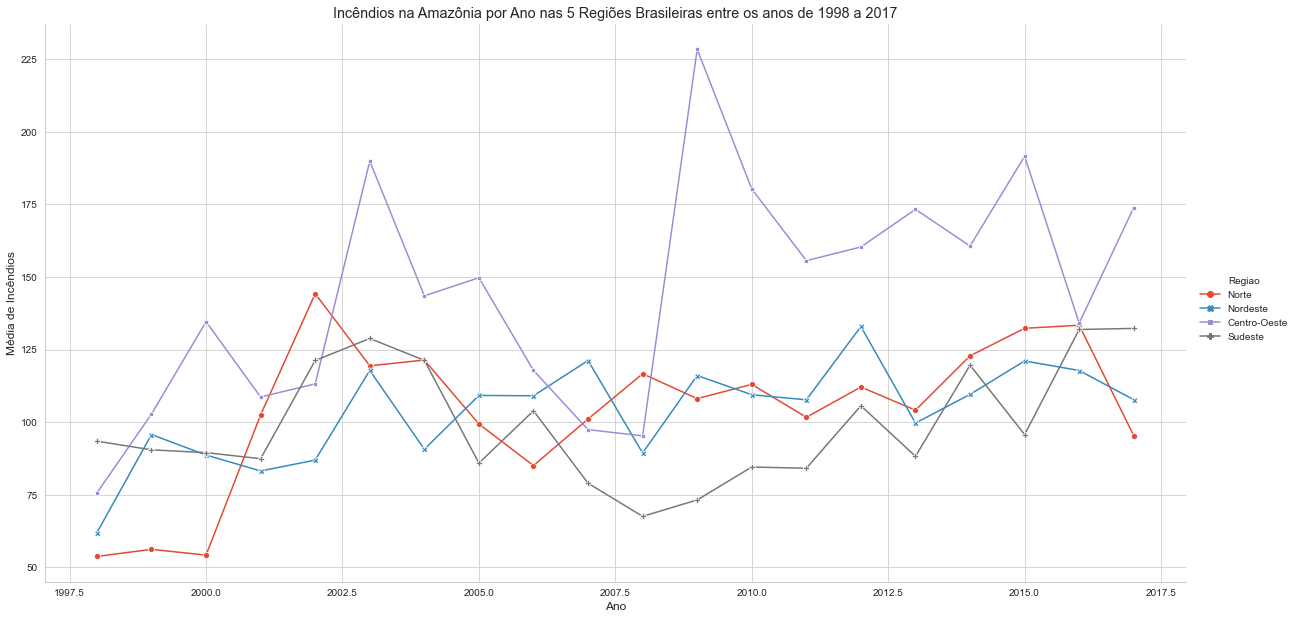

In [22]:
sns.set_style('whitegrid')
sns.relplot(x = 'Ano', y = 'Numero_Queimadas',
            data = df,
            kind = 'line',
            style = 'Regiao',
            hue ='Regiao',
            height = 8.27, 
            aspect = 20/10,
            ci = None,
            markers = True,
            dashes = False)
plt.xlabel('Ano')
plt.ylabel('Média de Incêndios')
plt.title('Incêndios na Amazônia por Ano nas 5 Regiões Brasileiras entre os anos de 1998 a 2017')

###### Análise por ano pela região

Text(0.5, 1.0, 'Incêndios na Amazônia por Ano nas 5 Regiões Brasileiras entre os anos de 1998 a 2017')

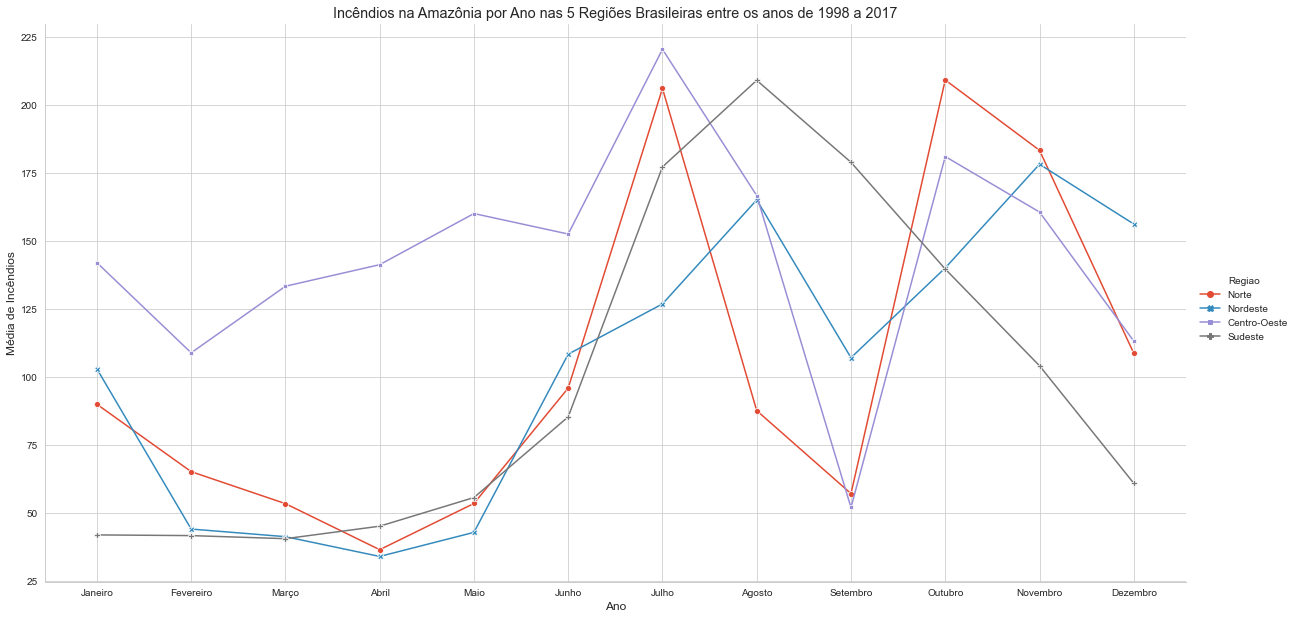

In [23]:
sns.set_style('whitegrid')
sns.relplot(x = 'Meses', y = 'Numero_Queimadas',
            data = df,
            kind = 'line',
            style = 'Regiao',
            hue ='Regiao',
            height = 8.27, 
            aspect = 20/10,
            ci = None,
            markers = True,
            dashes = False)
plt.xlabel('Ano')
plt.ylabel('Média de Incêndios')
plt.title('Incêndios na Amazônia por Ano nas 5 Regiões Brasileiras entre os anos de 1998 a 2017')